In [2]:
import random
import os
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path

%load_ext autoreload
%autoreload 2
from DQN.configuration_model import cm_model, get_degree_distribution

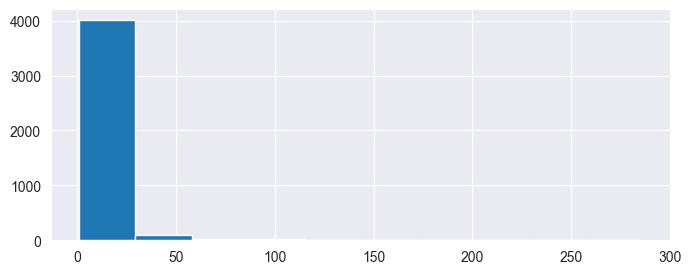

In [61]:
subdir = 'data/real/Cost'
file_name = "HI-II-14_degree.gml"
data_path = Path.cwd() / subdir
original_graph = nx.read_gml(data_path / file_name)
degrees = [original_graph.degree(n) for n in original_graph.nodes()]
plt.figure(figsize=(8,3))
plt.hist(degrees)
plt.show()

In [ ]:
# single graph generation via CM model
subdir = 'data/real/Cost'
file_name = "HI-II-14_degree.gml"
data_path = Path.cwd() / subdir / file_name

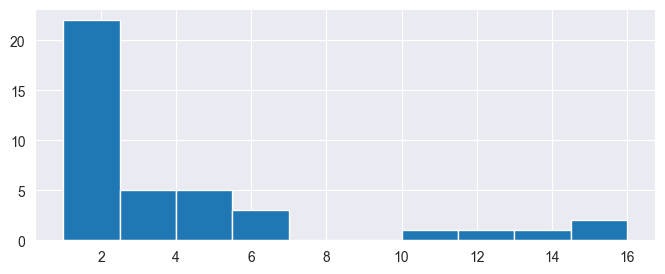

In [62]:

n_samples = 40
unique_degrees, cumulative_probs, degrees_original = get_degree_distribution(data_path)
G = cm_model(unique_degrees, cumulative_probs, degrees_original, n_samples)
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(8,3))
plt.hist(degrees)
plt.show()

In [7]:
subdir = 'data/real/Cost'
file_name = "Crime_degree.gml"
data_path = Path.cwd() / subdir / file_name
unique_degrees, cumulative_probs, degrees_original = get_degree_distribution(data_path)

In [8]:
for i in range(10000):

    graph = cm_model(unique_degrees, cumulative_probs, degrees_original, random.randint(30,50), seed=10000)
    print(len(graph.nodes()))
    subdir = 'data/cm/Crime_degree'
    file_name = f"g_{i+10000}"
    file_path = Path.cwd()/subdir/file_name
    
    nx.write_gml(graph, file_path)

    print(f"Graph {i} saved to {file_path}")

42
Graph 0 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10000
37
Graph 1 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10001
37
Graph 2 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10002
42
Graph 3 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10003
40
Graph 4 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10004
31
Graph 5 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10005
31
Graph 6 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10006
38
Graph 7 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10007
31
Graph 8 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10008
46
Graph 9 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10009
41
Graph 10 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10010
31
Graph 11 saved to C:\rituja_git\ma-rituja-pardhi\data\cm\Crime_degree\g_10011
50
Graph 12 saved to C:\rituja_git\ma-

In [23]:
for i in range(100):

    graph = cm_model(unique_degrees, cumulative_probs, degrees_original, random.randint(30,50), seed=100)
    print(len(graph.nodes()))
    subdir = 'data/small_dataset/WS_val_30_50'
    file_name = f"g_{i}"
    file_path = Path.cwd()/subdir/file_name
    
    nx.write_gml(graph, file_path)

    print(f"Graph {i} saved to {file_path}")

39
Graph 0 saved to C:\rituja_git\ma-rituja-pardhi\data\small_dataset\WS_val_30_50\g_0
35
Graph 1 saved to C:\rituja_git\ma-rituja-pardhi\data\small_dataset\WS_val_30_50\g_1
30
Graph 2 saved to C:\rituja_git\ma-rituja-pardhi\data\small_dataset\WS_val_30_50\g_2
45
Graph 3 saved to C:\rituja_git\ma-rituja-pardhi\data\small_dataset\WS_val_30_50\g_3
42
Graph 4 saved to C:\rituja_git\ma-rituja-pardhi\data\small_dataset\WS_val_30_50\g_4
31
Graph 5 saved to C:\rituja_git\ma-rituja-pardhi\data\small_dataset\WS_val_30_50\g_5
38
Graph 6 saved to C:\rituja_git\ma-rituja-pardhi\data\small_dataset\WS_val_30_50\g_6
48
Graph 7 saved to C:\rituja_git\ma-rituja-pardhi\data\small_dataset\WS_val_30_50\g_7
50
Graph 8 saved to C:\rituja_git\ma-rituja-pardhi\data\small_dataset\WS_val_30_50\g_8
36
Graph 9 saved to C:\rituja_git\ma-rituja-pardhi\data\small_dataset\WS_val_30_50\g_9
35
Graph 10 saved to C:\rituja_git\ma-rituja-pardhi\data\small_dataset\WS_val_30_50\g_10
46
Graph 11 saved to C:\rituja_git\ma-rit

In [19]:
G = nx.barabasi_albert_graph(500, m=4)
subdir = 'data/real/Cost'
file_name = 'BA_degree.gml'
file_path = Path.cwd()/subdir/file_name

degrees = dict(G.degree())
max_degree = max(degrees.values())
degree_weights = {int(node): degree / max_degree for node, degree in degrees.items()}
nx.set_node_attributes(G, degree_weights, 'weight')
nx.write_gml(G, file_path)

In [45]:
n=8000
for i in range(n):

    G = nx.barabasi_albert_graph(random.randint(30,50), m=4, seed=n)
    #G = nx.connected_watts_strogatz_graph(n=random.randint(30,50), k=8, p=0.1, seed=n)
    #G = nx.erdos_renyi_graph(n=random.randint(30,50), p=0.15, seed=n)
    print(len(G.nodes()))
    
    degrees = dict(G.degree())
    max_degree = max(degrees.values())
    degree_weights = {int(node): degree / max_degree for node, degree in degrees.items()}
    nx.set_node_attributes(G, degree_weights, 'weight')
    subdir = 'data/synthetic_small_dataset/BA_30_50'
    file_name = f"g_{i}"
    file_path = Path.cwd()/subdir/file_name
    
    nx.write_gml(G, file_path)

    print(f"Graph {i} saved to {file_path}")

40
Graph 0 saved to C:\rituja_git\ma-rituja-pardhi\data\synthetic_small_dataset\ER_30_50\g_0
48
Graph 1 saved to C:\rituja_git\ma-rituja-pardhi\data\synthetic_small_dataset\ER_30_50\g_1
33
Graph 2 saved to C:\rituja_git\ma-rituja-pardhi\data\synthetic_small_dataset\ER_30_50\g_2
43
Graph 3 saved to C:\rituja_git\ma-rituja-pardhi\data\synthetic_small_dataset\ER_30_50\g_3
38
Graph 4 saved to C:\rituja_git\ma-rituja-pardhi\data\synthetic_small_dataset\ER_30_50\g_4
33
Graph 5 saved to C:\rituja_git\ma-rituja-pardhi\data\synthetic_small_dataset\ER_30_50\g_5
32
Graph 6 saved to C:\rituja_git\ma-rituja-pardhi\data\synthetic_small_dataset\ER_30_50\g_6
30
Graph 7 saved to C:\rituja_git\ma-rituja-pardhi\data\synthetic_small_dataset\ER_30_50\g_7
34
Graph 8 saved to C:\rituja_git\ma-rituja-pardhi\data\synthetic_small_dataset\ER_30_50\g_8
40
Graph 9 saved to C:\rituja_git\ma-rituja-pardhi\data\synthetic_small_dataset\ER_30_50\g_9
34
Graph 10 saved to C:\rituja_git\ma-rituja-pardhi\data\synthetic_sma